In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import os
os.chdir(r'C:\Users\user\Desktop')

# 1. DecisionTreeClassifier
* 特徵彼此間不能有相關性、共線性
* DecisionTreeClassifier與DecisionTreeRegressor可將連續型變數離散化

### Data

In [17]:
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()
iris['data'].shape
iris['target']

(150, 4)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Parameters
* criterion: 'gini' or 'entropy'
* max_depth: 建幾層的樹
* random_state 

In [16]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='gini',
                                  max_depth=3,
                                  random_state=1)
clf = clf.fit(iris.data, iris.target)

### Attribute
* .predict(x, check_input=True)
* .score(x, y)
* .feature_importances_ 每個特徵的重要性，用Gini(S)-Gini_a(S)計算
* .get_params  
&nbsp;
* .classes_ 應變數有哪些label
* .n_classes_應變數有幾個label
* .max_features_ 有幾個特徵參與分類

In [3]:
clf.get_params
clf.predict(iris.data, check_input=True)
clf.score(iris.data, iris.target)
clf.feature_importances_

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')>

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

0.9733333333333334

array([0.        , 0.        , 0.05393633, 0.94606367])

# 2. graphviz

* feature_names 特徵名稱
* class_names 應變數每個label的名稱  
&nbsp;
* value: class的各個label在該葉結點的個數

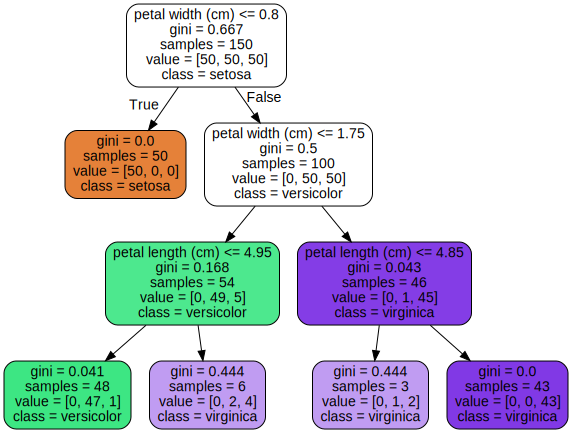

In [24]:
import graphviz
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = tree.export_graphviz(clf, 
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True, 
                                rounded=True,
                                out_file=None)  
graph = graphviz.Source(dot_data)
graph
#graph=graph_from_dot_data(dot_data)
#graph.write_png('tree.png')

# 3. 特徵需轉成數值型態
* 特徵不具順序性，用onehotencoder
* 特徵具順序性，用labelencoder
* 所謂的有序性並非該特徵本身具順序型，而是該特徵的順序會對應變數具影響性

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

names=['age','workclass','fnlwgt','education','education-num',
       'marital-status','occupation','relationship','race','sex',
       'capital-gain','capital-loss','hours-per-week','native-country',
       'income']
data=pd.read_csv(r'.\git hub\machine learning\data mining\Classification\decision tree\adult.data.csv',header=None,names=names)

df=data.loc[:,['education','income']]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

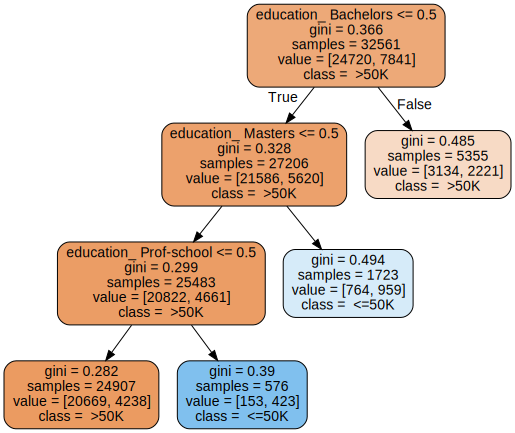

In [26]:
data_dummies=pd.get_dummies(df,drop_first=True)
x=data_dummies.iloc[:,:-1]
y=df['income']
tree=DecisionTreeClassifier(criterion='gini',random_state=1,max_depth=3)
tree.fit(x,y)

import graphviz
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data=export_graphviz(tree,
                         filled=True,
                         rounded=True,
                         class_names=list(set(data['income'])),
                         feature_names=x.columns.values,
                         out_file=None)
graph = graphviz.Source(dot_data)
graph
#graph=graph_from_dot_data(dot_data)
#graph.write_png('tree.png')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

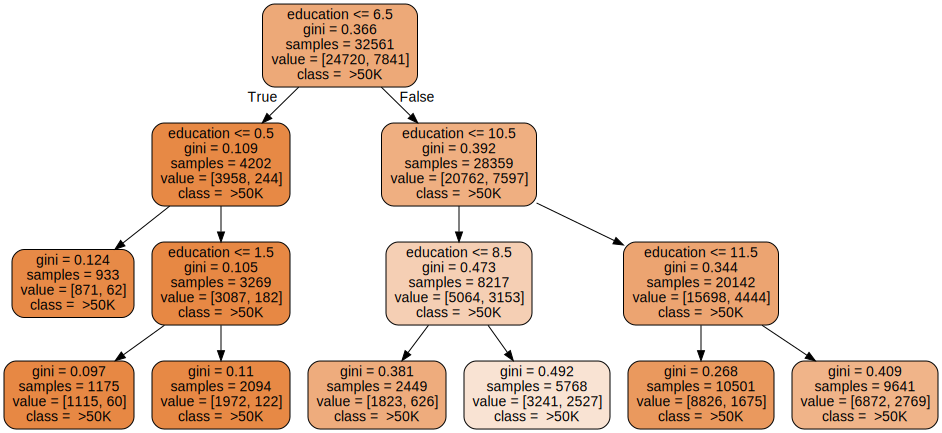

In [27]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['education']=label.fit_transform(df['education'])
x=pd.DataFrame(df['education'])
y=pd.DataFrame(df['income'])
tree=DecisionTreeClassifier(criterion='gini',random_state=1,max_depth=3)
tree.fit(x,y)

import graphviz
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data=export_graphviz(tree,
                         filled=True,
                         rounded=True,
                         class_names=list(set(data['income'])),
                         feature_names=x.columns.values,
                         out_file=None)
graph = graphviz.Source(dot_data)
graph
#graph=graph_from_dot_data(dot_data)
#graph.write_png('tree.png')

# 4. DecisionTreeRegressor

* 畫線性圖時，須先將自變數X排序
* 樹狀圖沒有Class_name

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

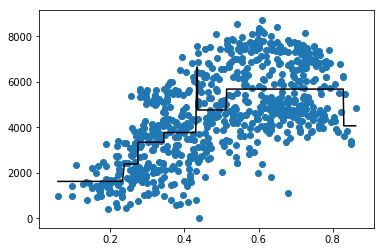

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
data=pd.read_csv(r'.\git hub\machine learning\data mining\Classification\decision tree\day.csv')
x=data[['temp']].values
y=data[['cnt']].values

tree=DecisionTreeRegressor(max_depth=3)
tree.fit(x,y)

sort_idx=x.flatten().argsort()
plt.scatter(x,y)
plt.plot(x[sort_idx],tree.predict(x[sort_idx]),color='black')

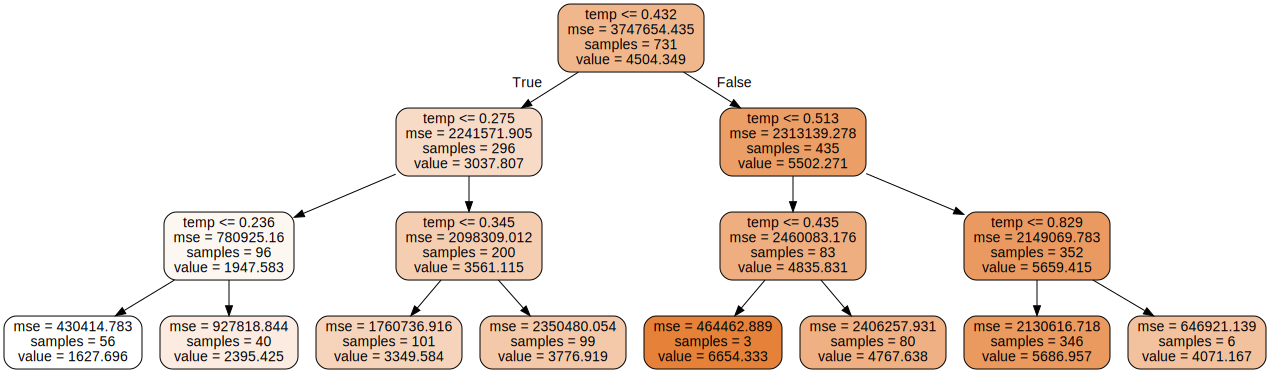

In [29]:
import graphviz
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data=export_graphviz(tree,
                         filled=True,
                         rounded=True,
                         feature_names=['temp'],
                         out_file=None)
graph = graphviz.Source(dot_data)
graph
#graph=graph_from_dot_data(dot_data)
#graph.write_png('tree.png')

# 5. DecisionTreeRegressor 將連續型變數離散化

In [33]:
x=data[['temp']].values
y=data[['cnt']].values
tree=DecisionTreeRegressor(max_depth=3)
tree.fit(x,y)
tree.score(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

0.5537137970465487

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
data=pd.read_csv(r'.\git hub\machine learning\data mining\Classification\decision tree\day.csv')
print(data['temp'])
def Transform_to_Discrete(data,target,X):    
    x=data[[X]]
    y=data[[target]]
    tree=DecisionTreeRegressor(max_depth=3)
    tree.fit(x,y)
    y_pred=tree.predict(x)
    
    y_pred_df=pd.DataFrame(y_pred,columns=[target])
    concat=pd.concat([x,y_pred_df],axis=1)
    concat.sort_values(by=X,inplace=True)
    concat.reset_index(drop=True,inplace=True)
    
    label_random=list(set(y_pred))
    index_list=[]
    for i in label_random:
        index=concat.loc[concat[target]==i].index[0]
        index_list.append(index)
    index_list.sort()
    label_sort=[]
    for i in index_list:
        label_sort.append(concat[target][i])
    
    for i,j in zip(label_sort,range(len(label_sort))):
        index=concat.loc[concat[target]==i].index
        concat.loc[index,X]=j
    
    data[X]=concat[X]
    
Transform_to_Discrete(data,'cnt','temp')

0      0.344167
1      0.363478
2      0.196364
3      0.200000
4      0.226957
5      0.204348
6      0.196522
7      0.165000
8      0.138333
9      0.150833
10     0.169091
11     0.172727
12     0.165000
13     0.160870
14     0.233333
15     0.231667
16     0.175833
17     0.216667
18     0.292174
19     0.261667
20     0.177500
21     0.059130
22     0.096522
23     0.097391
24     0.223478
25     0.217500
26     0.195000
27     0.203478
28     0.196522
29     0.216522
         ...   
701    0.347500
702    0.452500
703    0.475833
704    0.438333
705    0.255833
706    0.320833
707    0.381667
708    0.384167
709    0.435833
710    0.353333
711    0.297500
712    0.295833
713    0.281667
714    0.324167
715    0.362500
716    0.393333
717    0.410833
718    0.332500
719    0.330000
720    0.326667
721    0.265833
722    0.245833
723    0.231304
724    0.291304
725    0.243333
726    0.254167
727    0.253333
728    0.253333
729    0.255833
730    0.215833
Name: temp, Length: 731,

In [35]:
data['temp']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
701    6.0
702    6.0
703    6.0
704    6.0
705    6.0
706    6.0
707    6.0
708    6.0
709    6.0
710    6.0
711    6.0
712    6.0
713    6.0
714    6.0
715    6.0
716    6.0
717    6.0
718    6.0
719    6.0
720    6.0
721    6.0
722    6.0
723    6.0
724    6.0
725    7.0
726    7.0
727    7.0
728    7.0
729    7.0
730    7.0
Name: temp, Length: 731, dtype: float64